In [16]:
pip install folium


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [18]:
# Load the dataset with a specified encoding
df = pd.read_csv('terrorism.csv', encoding='latin1')

# Basic data overview
print(df.info())
print(df.describe(include='all'))

C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\1201997593.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('terrorism.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
             eventid          iyear         imonth           iday  \
count   1.816910e+05  181691.000000  181691.000000  181691.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    2.002705e+11    2002.638997       6.467277      15.505644   
std     1.325957e+09      13.259430       3.388303       8.814045   
min     1.970000e+11    1970.000000       0.000000       0.000000   
25%     1.991021e+11    1991.000000       4.000000       8.000000   
50%     2.009022e+11    2009.000000       6.000000      15.000000   
75%     2.014081e+11    2014.000000       9.000000      23.000000   
max     2.017123e+11    2017.000000      12.000000

In [19]:
# Handle missing values
df.fillna({'city': 'Unknown', 'provstate': 'Unknown', 'summary': 'No summary provided'}, inplace=True)

In [20]:
# Create a date column with default values for missing months and days
df['imonth'].replace(0, 1, inplace=True)  # Replace missing months with January
df['iday'].replace(0, 1, inplace=True)    # Replace missing days with 1

C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\1031319726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imonth'].replace(0, 1, inplace=True)  # Replace missing months with January
C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\1031319726.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [21]:
# Convert to datetime
df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1), errors='coerce')

In [22]:
# Basic data overview
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, eventid to date
dtypes: datetime64[ns](1), float64(55), int64(22), object(58)
memory usage: 188.5+ MB
None
             eventid          iyear         imonth           iday  \
count   1.816910e+05  181691.000000  181691.000000  181691.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    2.002705e+11    2002.638997       6.467387      15.510548   
min     1.970000e+11    1970.000000       1.000000       1.000000   
25%     1.991021e+11    1991.000000       4.000000       8.000000   
50%     2.009022e+11    2009.000000       6.000000      15.000000   
75%     2.014081e+11    2014.000000       9.000000      23.000000   
max     2.017123e+11    2017.000000      12.000000      31.000000   
std     1.325957e+09      13.25943

In [23]:
# Handle missing values
df.fillna({'city': 'Unknown', 'provstate': 'Unknown', 'summary': 'No summary provided'}, inplace=True)


C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\4100830256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='iyear', palette='viridis')


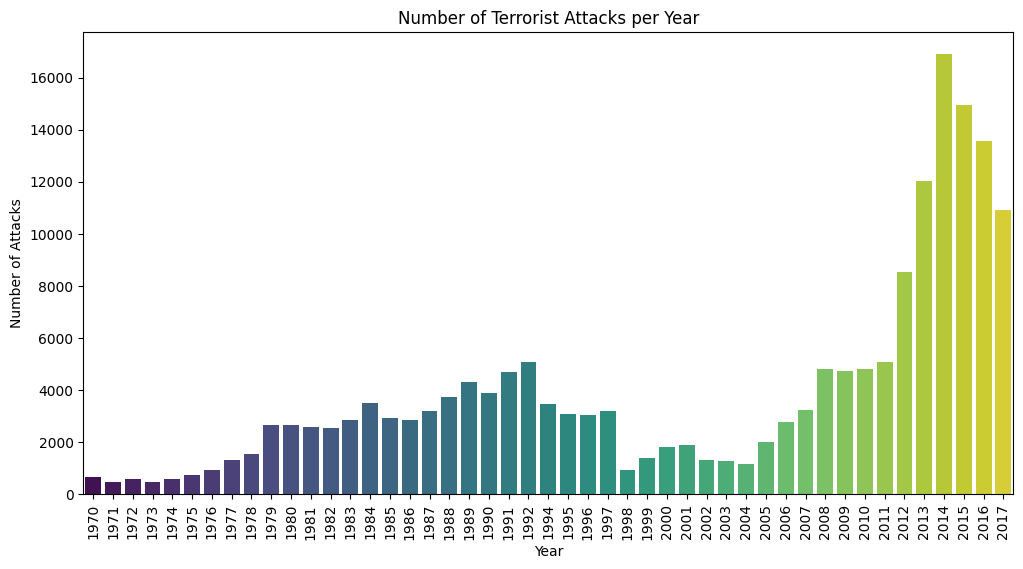

In [24]:
# Plotting the number of attacks per year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='iyear', palette='viridis')
plt.title('Number of Terrorist Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

In [25]:

# Geographical distribution of attacks
terror_map = folium.Map(location=[20, 0], zoom_start=2)

In [26]:
for _, row in df.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            popup=f"{row['city']}, {row['country_txt']}",
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(terror_map)

terror_map.save('terror_map.html')

C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\3831691924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


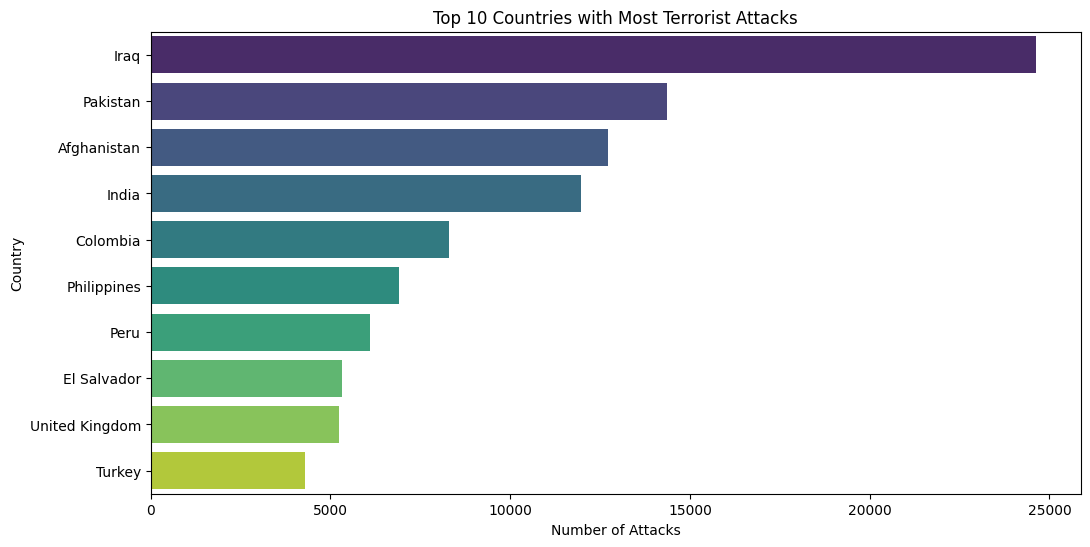

In [27]:
# Top 10 countries with the most attacks
top_countries = df['country_txt'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()


C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\3658442018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='region_txt', palette='viridis', order=df['region_txt'].value_counts().index)


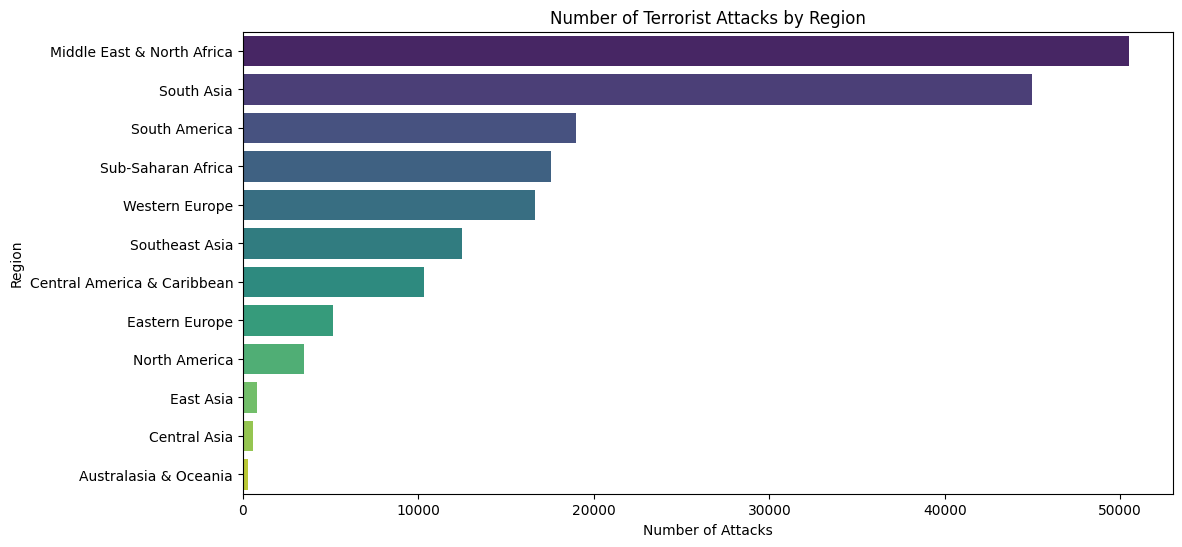

In [28]:
# Number of attacks by region
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='region_txt', palette='viridis', order=df['region_txt'].value_counts().index)
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()

C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\3380926941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='attacktype1_txt', palette='viridis', order=df['attacktype1_txt'].value_counts().index)


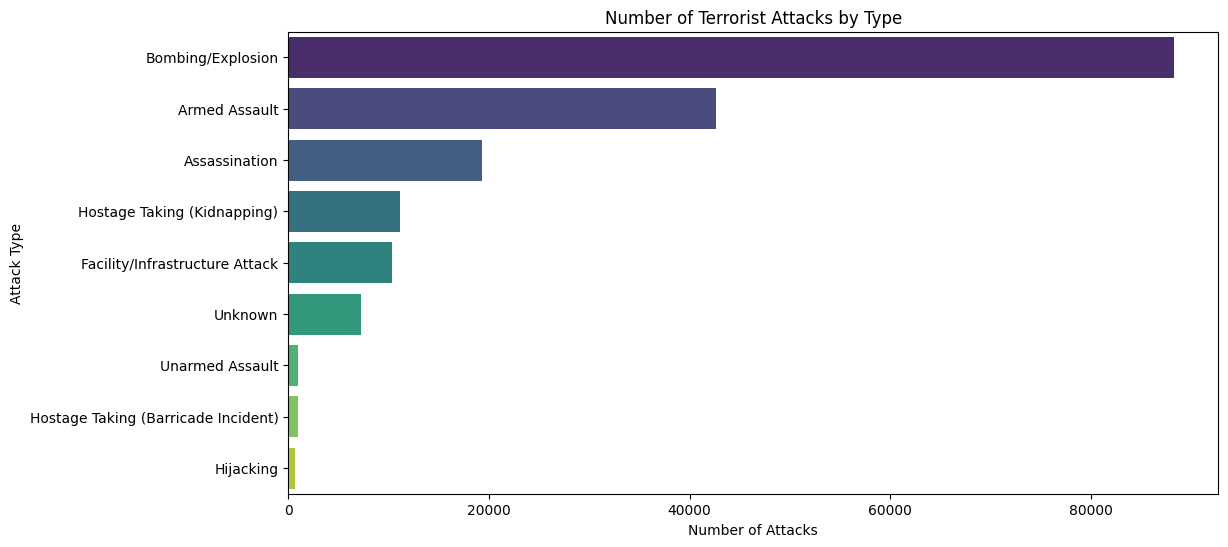

In [29]:
# Analysis of attack types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='attacktype1_txt', palette='viridis', order=df['attacktype1_txt'].value_counts().index)
plt.title('Number of Terrorist Attacks by Type')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

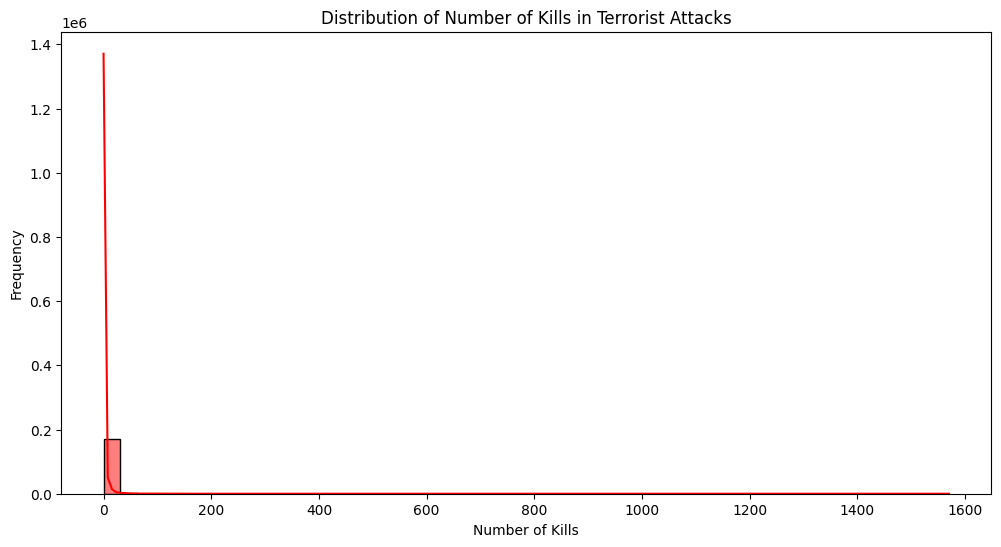

In [30]:

# Casualty analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['nkill'].dropna(), bins=50, kde=True, color='red')
plt.title('Distribution of Number of Kills in Terrorist Attacks')
plt.xlabel('Number of Kills')
plt.ylabel('Frequency')
plt.show()

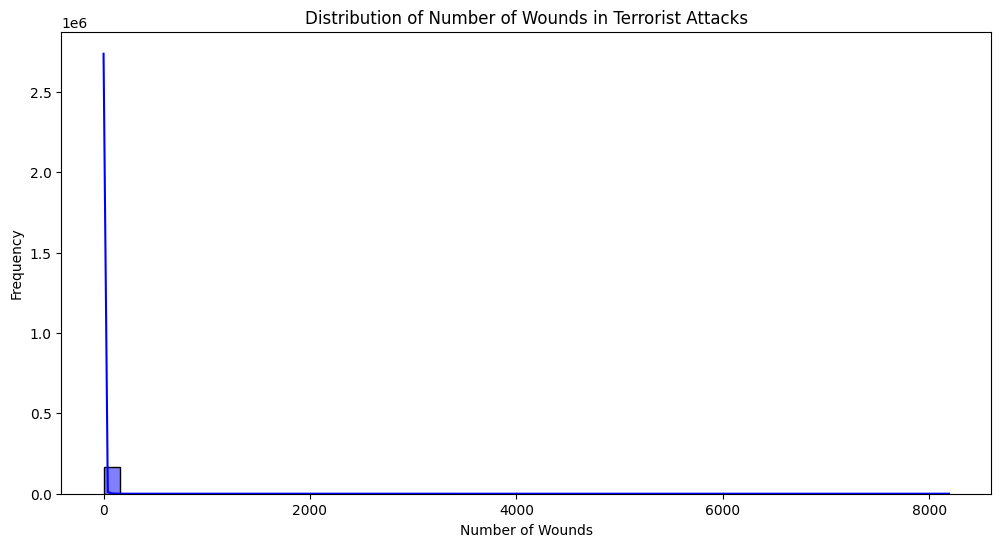

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['nwound'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Number of Wounds in Terrorist Attacks')
plt.xlabel('Number of Wounds')
plt.ylabel('Frequency')
plt.show()

C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\3864552378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')


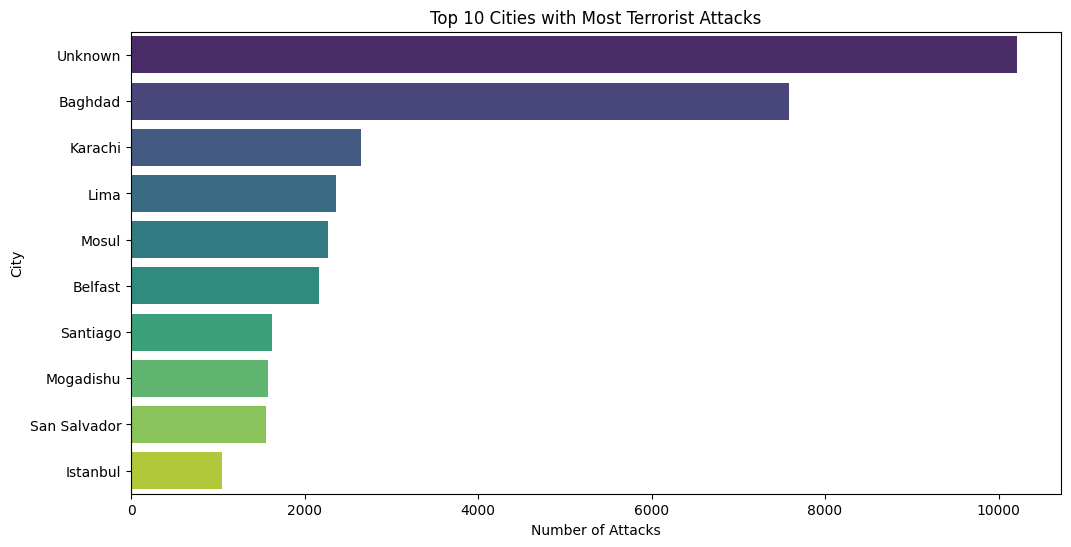

In [32]:
# Number of attacks per city
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('City')
plt.show()

C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\3650063067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='success', palette='viridis')


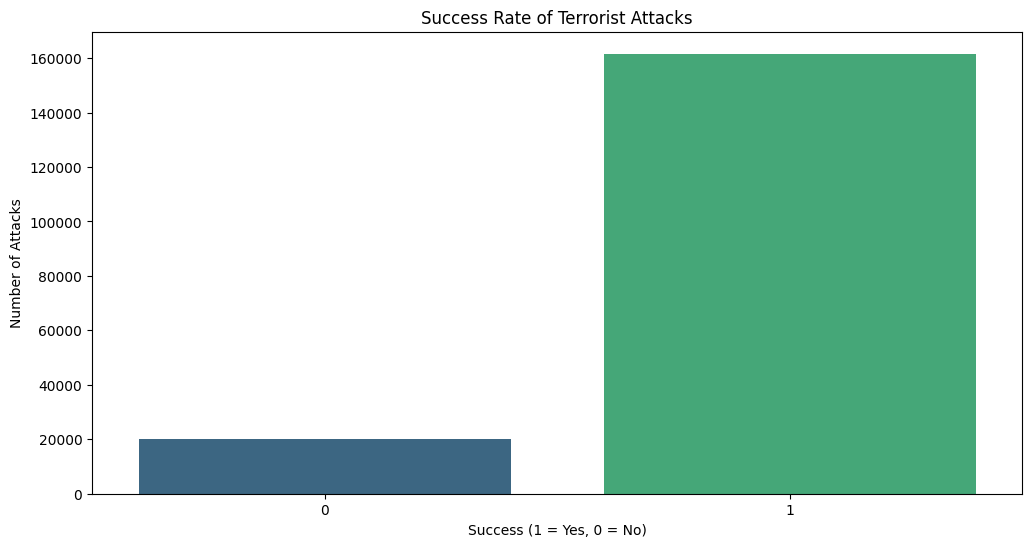

In [33]:
# Success rate of attacks
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='success', palette='viridis')
plt.title('Success Rate of Terrorist Attacks')
plt.xlabel('Success (1 = Yes, 0 = No)')
plt.ylabel('Number of Attacks')
plt.show()

C:\Users\SANTHOSH KRISHNAN R\AppData\Local\Temp\ipykernel_39660\1010143521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='suicide', palette='viridis')


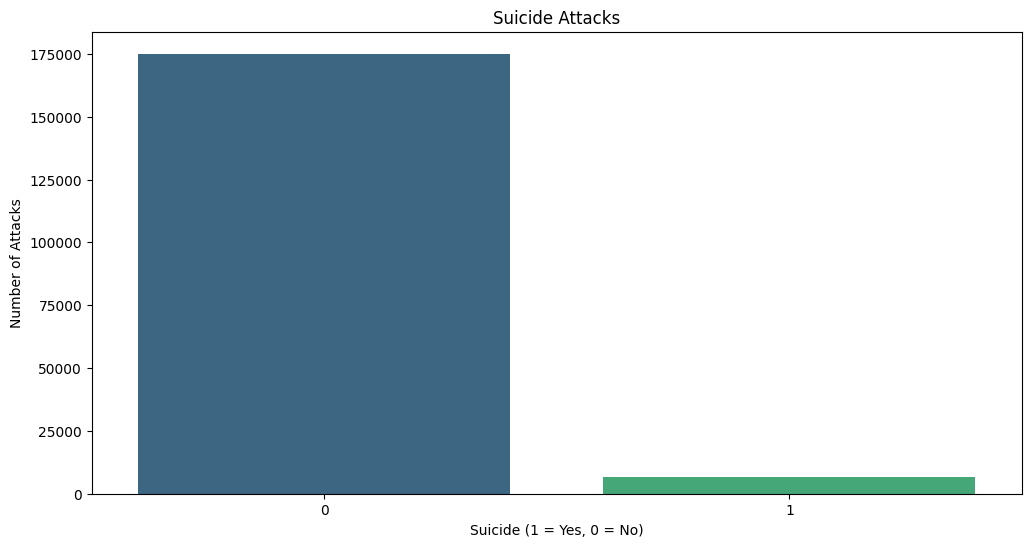

In [34]:
# Suicide attacks analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='suicide', palette='viridis')
plt.title('Suicide Attacks')
plt.xlabel('Suicide (1 = Yes, 0 = No)')
plt.ylabel('Number of Attacks')
plt.show()